#### Importing Libraries

In [479]:
import warnings
warnings.filterwarnings('ignore')

In [480]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as mn

# Reading and Understanding the data

In [481]:
bike = pd.read_csv("Documents\day.csv")

In [482]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [483]:
bike.shape

(730, 16)

In [484]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [485]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [486]:
#checking missing value in the dataset
features_with_na=[features for features in bike.columns if bike[features].isna().sum()>1]


In [487]:
# No of nulls/number of record to get the percentage of null values
for i in features_with_na:
    print(i, np.round(bike[i].isna().mean(),4), '% missing values')

In [488]:
#check the date column and convert the same.
bike['dteday'].dtype

dtype('O')

In [489]:
#converting the column to datetime
bike['dteday']=pd.to_datetime(bike['dteday'],format ='%d-%m-%Y')

In [490]:
bike.dteday.dtype

dtype('<M8[ns]')

In [491]:
#extracting the year and month from the dteday column for calculation
bike['year']=pd.DatetimeIndex(bike.dteday).year

In [492]:
bike['month']=pd.DatetimeIndex(bike.dteday).month

In [493]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [494]:
#As extracted year and month from the date field so no need of yr and mnth column in the dataset
# and addtional conversion for the same 
#so dropping the column

bike.drop(['yr','mnth'],axis=1,inplace=True)

In [495]:
bike.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [496]:
#dropping holiday column as it will be captured as part of working days and it's having redundant data
bike.drop('holiday',axis=1,inplace=True)

In [497]:
bike.head()

,instant,dteday,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [498]:
# dropping some irrlevent columns as we can extract the same from other columns
bike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [499]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [500]:
#Giving a meaning full name to the columns
bike.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [501]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [502]:
#Mapping columns value with corresponding string value for getting the required information in the visualization
mapper={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike.season=bike.season.map(mapper)

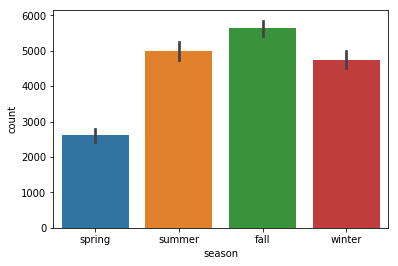

In [503]:
sns.barplot('season','count',data=bike)

bike rental are more in the fall season.

In [504]:
mapper = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike['weathersit'] = bike['weathersit'].map(mapper)

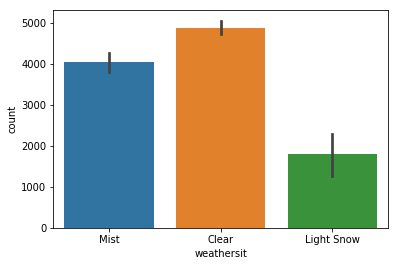

In [505]:
sns.barplot('weathersit','count',data=bike)

bikes rented more in the clear wether+ Mist wether

In [506]:
mapper = {1:'working_day',0:'Holiday'}
bike['workingday'] = bike['workingday'].map(mapper)

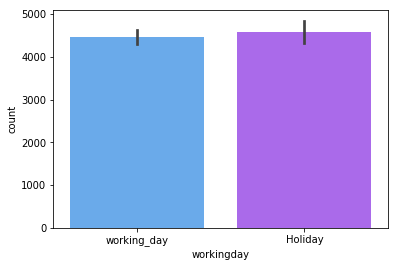

In [507]:
sns.barplot('workingday','count',data=bike,palette='cool')

Bike rented more in the Holiday but it's very close to working_days as well.

In [508]:
mapper = {2019:1,2018:0}
bike['year'] = bike['year'].map(mapper)

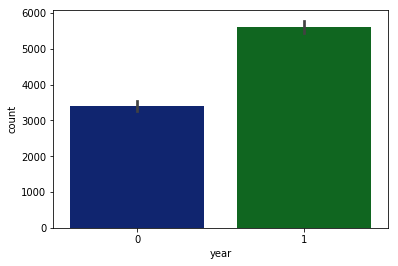

In [509]:
sns.barplot('year','count',data=bike,palette='dark')

Bike rent increased more in 2019 compare to 2018

In [510]:
mapper = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['month'] = bike['month'].map(mapper)

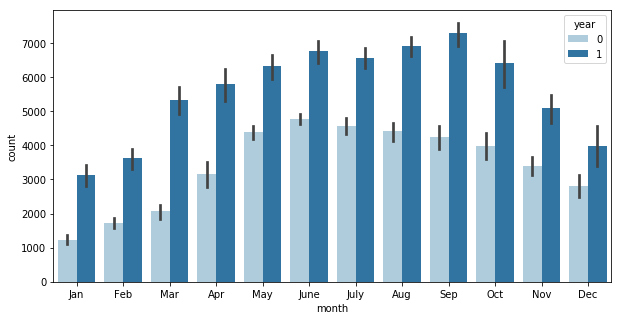

In [511]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike,palette='Paired')

In [512]:
mapper = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['weekday'] = bike['weekday'].map(mapper)

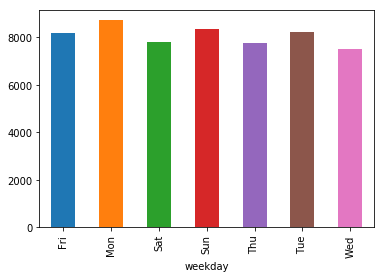

In [513]:
bike.groupby('weekday')['count'].max().plot(kind='bar')

Bike rent are more in monday and sunday 

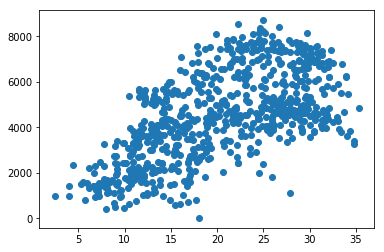

In [514]:
plt.scatter('temp','count',data=bike)

Bike rental are more in higher tempreture

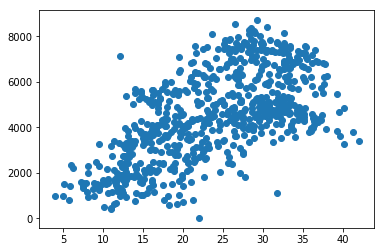

In [515]:
plt.scatter('atemp','count',data=bike)

Bike rental are more when we can feel the tempreture

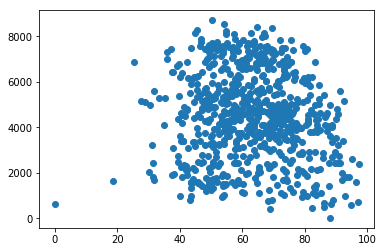

In [516]:
plt.scatter('humidity','count',data=bike)

Bike rentals are more during higher immunity

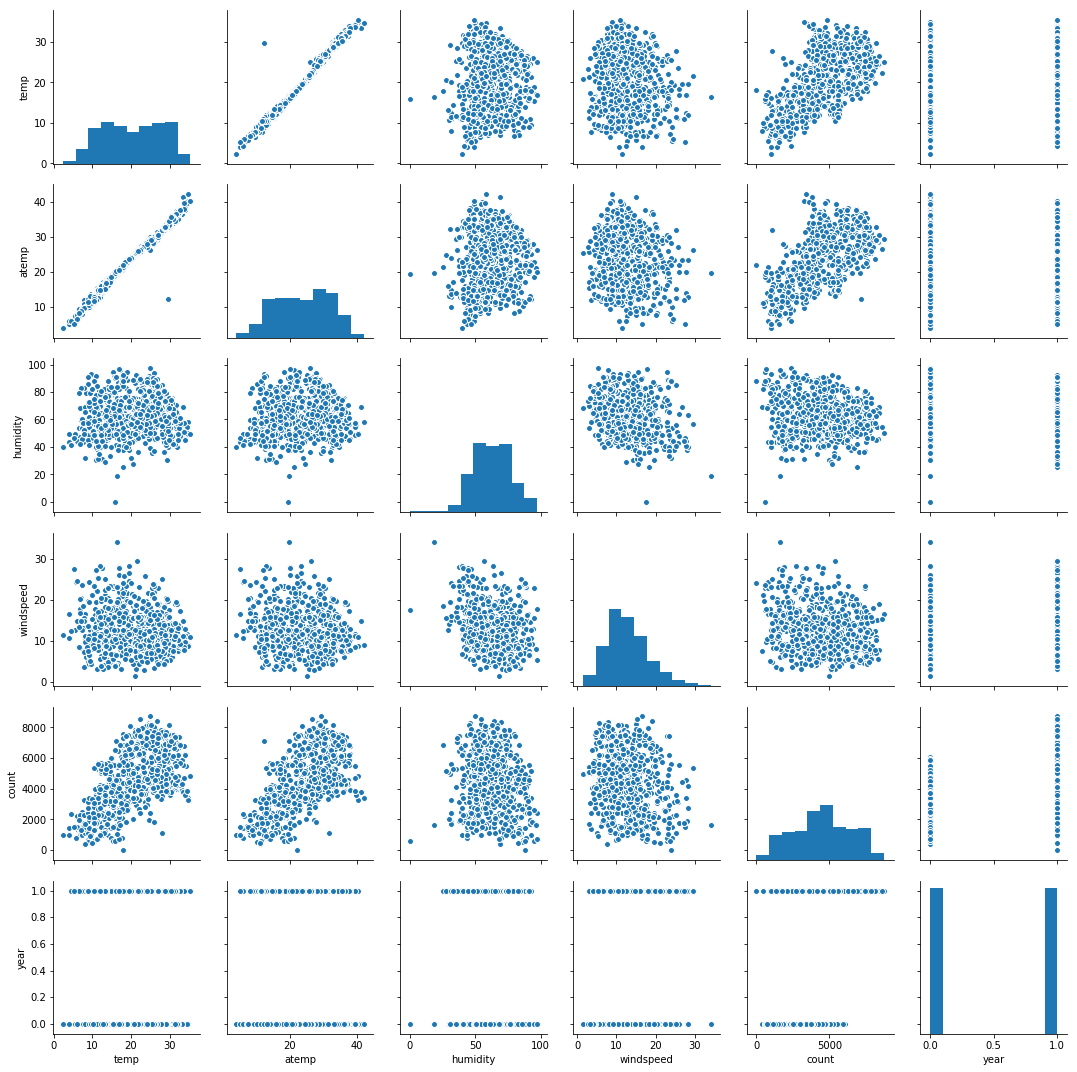

In [517]:
sns.pairplot(bike)

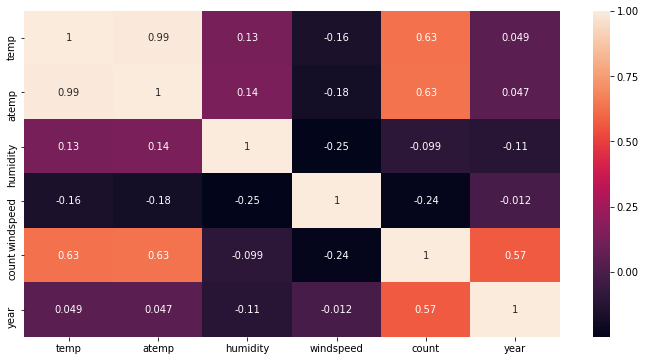

In [518]:
plt.figure(figsize = (12,6))
sns.heatmap(bike.corr(),annot=True)

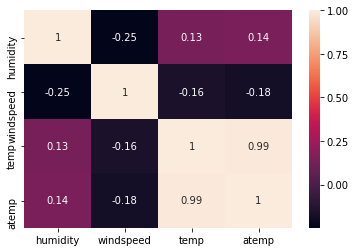

In [519]:
data= bike[['humidity','windspeed','temp','atemp',]]
sns.heatmap(data.corr(),annot=True)

temp and atemp are highly corelated and one can be drop to avoid multicollinearity

In [520]:
bike.drop('atemp',axis=1,inplace=True)
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


In [521]:
seasons = pd.get_dummies(bike['season'],drop_first=True)

working_day = pd.get_dummies(bike['workingday'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['month'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)

In [522]:
bike= pd.concat([bike,seasons,working_day,weather,month,week_day],axis=1)

In [523]:
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


In [524]:
# Dropping the categorical variables as they are already dummy are inclded

bike.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [525]:
bike.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [526]:
#Spliting data into training and test data

In [527]:
from sklearn.model_selection import train_test_split

In [528]:
nm.random.seed(0)

In [529]:
df_train,df_test = train_test_split(bike,train_size=0.7,test_size=0.3,random_state=100)

In [530]:
#Rescaling the features 

In [531]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [532]:
#Scaling all the columns except dummy variables

In [533]:
num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

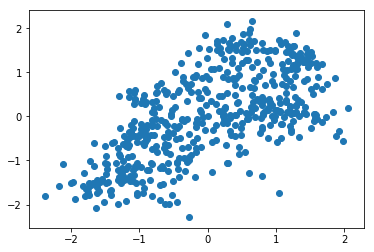

In [534]:
plt.scatter('temp','count',data=df_train)


In [535]:
y_train = df_train.pop('count')

In [536]:
X_train = df_train

In [537]:
X_train.head()

,temp,humidity,windspeed,year,spring,summer,winter,working_day,Light Snow,Mist,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,-0.121335,-0.514725,-0.117752,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1.231731,0.516433,-0.330615,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
426,-0.420478,-0.069854,-0.385694,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
728,-1.294913,-1.045032,2.018143,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,-0.627580,-1.000840,-0.779889,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [538]:
y_train.head()

653    1.562685
576    1.399629
426   -0.215554
728   -1.379511
482   -0.136589
Name: count, dtype: float64

In [539]:
#Linear model building

In [540]:
#using RFE for automated feature selection approach.

In [541]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [542]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [543]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [544]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [545]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [546]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [547]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [548]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          3.16e-176
Time:                        17:12:25   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp            0.4029      0.027     14.765      0.000       0.349       0.457
year            1.0473      0.039     27.009      0.000       0.971       1.123
spring         -0.6760      0.057    -11.825      0.000      -0.788      -0.564
working_day     0.3710      0.134      2.777      0.006       0.109       0.633
Light Snow     -1.2971      0.116    -11.212      0.000      -1.524      -1.070
Mist           -0.3619      0.041     -8.739      0.000      -0.443      -0.281
July           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep             0.2874      0.074      3.884      0.000       0.142       0.433
Mon             0.4613      0.142      3.259      0.001       0.183       0.739
Sun             0.4451      0.142      3.131      0.002       0.166       0.724
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Variance Inflation Factor(VIF)

In [549]:
X_train_new= X_train_rfe.drop('const',axis=1)

In [550]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.58
2,spring,2.10
0,temp,2.02
1,year,2.02
5,Mist,1.58
8,Mon,1.39
6,July,1.38
9,Sun,1.33
7,Sep,1.18
4,Light Snow,1.07


All the variables have VIF less than 5, so we are good to go.

# Residual Analysis

In [551]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5,0,'Errors')

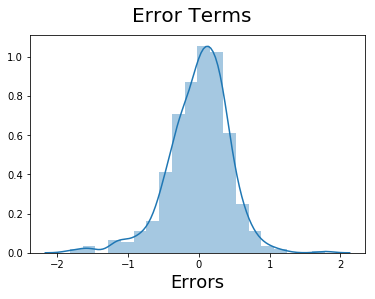

In [552]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

# Predictions

In [553]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [554]:
y_test = df_test.pop('count')
X_test = df_test

In [555]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [556]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0,0.5,'Predictions')

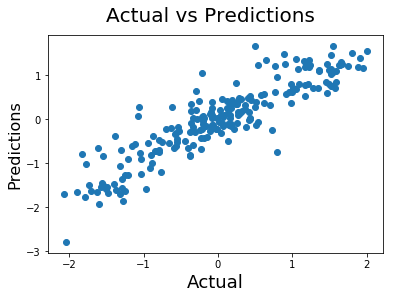

In [557]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)   

In [558]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8051381112407531

In [559]:
#Conclusion:
#The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:
#
#Spring season : -0.6760
#Temperature : 0.4029
#Mist : -0.3619
#Mun,Sun : 0.4613,0.4451
#working_day : 0.3710

In [560]:
#Assumptions of Linear Regression:
#The error terms are normally distributed.
#The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
#The predicted values have linear relationship with the actual values